In [26]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT
import math
import numpy as np
import sys

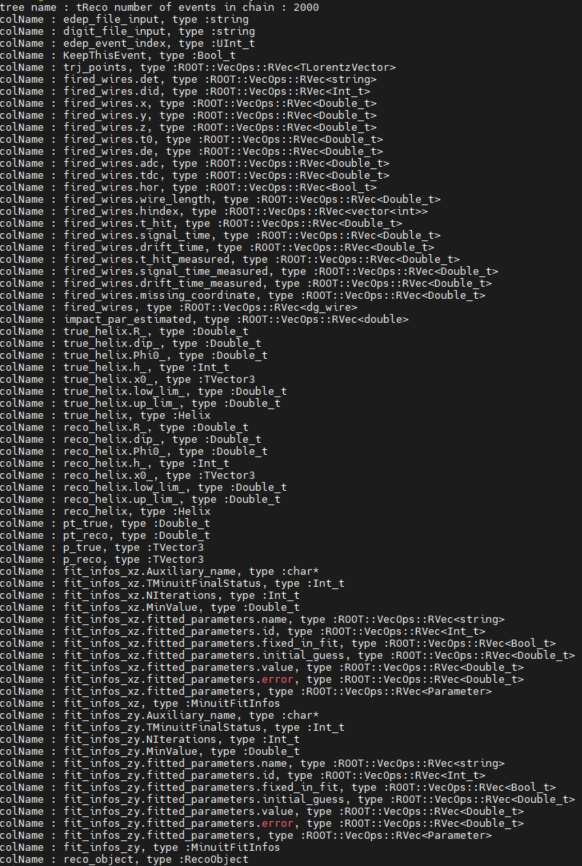

In [27]:
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/python_tools')
from ROOT_tools import ROOT_tools
from MultiPlotter import MultiPlotter
from ROOT2Pandas import Converter
from SampleManager import Sample, Manager
tool = ROOT_tools()

In [28]:
def Tuple2String(input_column: tuple) -> str:
    """
    Parse input column (tuple) and return a short name.
    
    Example:
    ('PrimariesFirstHitECAL', 'fP', 'fX') -> PrimariesFirstHitECAL_x
    ('PrimariesFirstHitECAL', 'fE', '')   -> PrimariesFirstHitECAL_t
    """
    colName, suffix1, suffix2 = input_column
    if suffix1 == 'fP':
        if suffix2 == 'fX':
            return colName + "_x"
        elif suffix2 == 'fY':
            return colName + "_y"
        elif suffix2 == 'fZ':
            return colName + "_z"
        else:
            return colName
    elif suffix1 == 'fE':
        return colName + "_t"
    else:
        return colName

In [29]:
tool = ROOT_tools()

file_name = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.to.1000.drift-reco.analysed.root"

tree_name = "tReco_extended"

converter = Converter([file_name], tree_name)

In [30]:
converter.keys()

['FileName', 'edep_file_input', 'digit_file_input', 'edep_event_index', 'IncomingNeutrinoP4', 'NuDirection', 'nof_fired_wires', 'Antimuon_Phi0_true', 'Antimuon_x0_true', 'Antimuon_pt_true', 'Antimuon_p_true', 'Antimuon_ptot_true', 'Antimuon_dip_true', 'Antimuon_Phi0_reco', 'Antimuon_x0_reco', 'Antimuon_pt_reco', 'Antimuon_p_reco', 'Antimuon_ptot_reco', 'Antimuon_dip_reco', 'chi2_fit_zy', 'chi2_fit_xz', 'Neutrino_reconstructed_P4_GeV', 'IncomingNeutrinoP4', 'PredictedNeutron_P3_GeV', 'FinalStateHadronicSystemTotal4Momentum']


In [33]:
columns = [
           'FileName',
           'nof_fired_wires',
        # 'edep_file_input',
           'digit_file_input',
        #    'edep_event_index',
           'Antimuon_pt_true',
           'Antimuon_pt_reco',
           'Antimuon_p_true',
           'Antimuon_p_reco',
           'Antimuon_ptot_true',
           'Antimuon_ptot_reco',
           'Antimuon_dip_true',
           'Antimuon_dip_reco',
           "Antimuon_Phi0_true",
           "Antimuon_Phi0_reco",
           "Antimuon_x0_true",
            "Antimuon_x0_reco",
            "chi2_fit_zy",
            "chi2_fit_xz",
           'PredictedNeutron_P3_GeV',
           'FinalStateHadronicSystemTotal4Momentum']

In [34]:
df = converter.CreatePandas(
    columns = columns,
    rename = True,
    # indices = ['edep_file_input','edep_event_index']
)

In [35]:
df

FileName nof_fired_wires  \
                                                                            
                                                                            
0        events-in-SANDtracker.0.gtrac.root:gRooTracker:1              85   
1        events-in-SANDtracker.0.gtrac.root:gRooTracker:3             113   
2        events-in-SANDtracker.0.gtrac.root:gRooTracker:9             162   
3       events-in-SANDtracker.0.gtrac.root:gRooTracker:10             126   
4       events-in-SANDtracker.0.gtrac.root:gRooTracker:15              44   
...                                                   ...             ...   
280202  events-in-SANDtracker.229.gtrac.root:gRooTrack...              37   
280203  events-in-SANDtracker.229.gtrac.root:gRooTrack...              47   
280204  events-in-SANDtracker.229.gtrac.root:gRooTrack...             119   
280205  events-in-SANDtracker.229.gtrac.root:gRooTrack...             123   
280206  events-in-SANDtracker.229.gtrac.root:gRooTrack...              59   

                                         digit_file_input Antimuon_pt_true  \
                                                                             
                                                                             
0       /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      1924.769848   
1       /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      2279.702384   
2       /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      2231.006965   
3       /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...       295.892974   
4       /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      1049.026000   
...                                                   ...              ...   
280202  /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      2556.449750   
280203  /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...       838.641034   
280204  /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      2473.787757   
280205  /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      4135.259446   
280206  /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...      2297.055000   

       Antimuon_pt_reco Antimuon_p_truefX Antimuon_p_truefY Antimuon_p_truefZ  \
                                                                                
                                                                                
0           2692.204764       -363.066983        285.028000       1903.548793   
1           2249.421918       -110.652730       -637.743525       2188.681374   
2           2107.798541       -418.351508       -575.204163       2155.581650   
3            234.712385          7.805161         66.723651        288.271758   
4           1021.601254        132.928277         53.440725       1047.663895   
...                 ...               ...               ...               ...   
280202    310284.625907       -429.830079        163.439861       2551.219853   
280203       796.332317       -944.789472        107.974679        831.661141   
280204      2458.808711        480.120805       -459.366470       2430.762907   
280205      4127.960598       1155.295526       -986.166194       4015.949069   
280206      2301.465740       -505.372404        396.937978       2262.499042   

       Antimuon_p_recofX Antimuon_p_recofY  ... Antimuon_x0_recofZ  \
                                            ...                      
                                            ...                      
0            -433.078125        403.387389  ...       23896.879210   
1            -105.406432       -631.910826  ...       23587.399586   
2            -386.260831       -539.388129  ...       23652.175089   
3              13.039900         31.417849  ...       24158.057673   
4             127.686553         50.747876  ...       25219.539895   
...                  ...               ...  ...                ...   
280202      53188.308781     -25423.294387  ...       24958.762551   
280203       -911.146399        105.828121

ranges for plotting

In [36]:
range = {}
range['px'] = np.arange(-1000, 1000, 5)
range['py'] = np.arange(-1000, 1000, 5)
range['pt'] = np.arange(-100, 5000, 50)
range['pz'] = np.arange(-100, 5000, 50)
range['ptot'] = np.arange(-100, 5000, 50)
range['dip'] = np.arange(-np.pi/2, np.pi/2, 0.05)
range['pt_res'] = np.arange(-1,1,0.1)

In [37]:
new_columns = {col: Tuple2String(col) for col in df.columns}
new_columns_list = [new_columns.get(col, col) for col in df.columns]

# Assegniamo la nuova lista di colonne al DataFrame
df.columns = new_columns_list
df = df.reset_index().set_index("FileName")
df['Antimuon_ptot_residual'] = (1/df['Antimuon_ptot_true'] - 1/df['Antimuon_ptot_reco'])/(1/df['Antimuon_ptot_reco'])
df['Antimuon_pt_residual'] = (1/df['Antimuon_pt_true'] - 1/df['Antimuon_pt_reco'])/(1/df['Antimuon_pt_reco'])
df

,index,nof_fired_wires,digit_file_input,Antimuon_pt_true,Antimuon_pt_reco,Antimuon_p_truefX,Antimuon_p_truefY,Antimuon_p_truefZ,Antimuon_p_recofX,Antimuon_p_recofY,...,chi2_fit_xz,PredictedNeutron_P3_GeVfX,PredictedNeutron_P3_GeVfY,PredictedNeutron_P3_GeVfZ,FinalStateHadronicSystemTotal4Momentum_x,FinalStateHadronicSystemTotal4Momentum_y,FinalStateHadronicSystemTotal4Momentum_z,FinalStateHadronicSystemTotal4Momentum_t,Antimuon_ptot_residual,Antimuon_pt_residual
FileName,,,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:1,0,85,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1924.769848,2692.204764,-363.066983,285.028000,1903.548793,-433.078125,403.387389,...,3082.834584,0.440958,-0.709736,0.448769,0.441082,-0.799170,0.690004,7.340290,0.392147,0.398715
events-in-SANDtracker.0.gtrac.root:gRooTracker:3,1,113,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,2279.702384,2249.421918,-110.652730,-637.743525,2188.681374,-105.406432,-631.910826,...,11.960083,0.107567,0.385909,0.181840,0.144089,0.221434,0.139154,0.985871,-0.013361,-0.013283
events-in-SANDtracker.0.gtrac.root:gRooTracker:9,2,162,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,2231.006965,2107.798541,-418.351508,-575.204163,2155.581650,-386.260831,-539.388129,...,886.643042,0.381973,0.310243,0.247215,0.350545,0.261628,0.413440,2.310031,-0.055947,-0.055225
events-in-SANDtracker.0.gtrac.root:gRooTracker:10,3,126,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,295.892974,234.712385,7.805161,66.723651,288.271758,13.039900,31.417849,...,1671.043599,-0.012691,-0.057968,0.027345,-0.156896,-1.069788,13.829546,16.881854,-0.205819,-0.206766
events-in-SANDtracker.0.gtrac.root:gRooTracker:15,4,44,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1049.026000,1021.601254,132.928277,53.440725,1047.663895,127.686553,50.747876,...,2.238038,-0.129238,-0.158860,0.033008,-0.320711,-0.221928,1.606001,3.129058,-0.026352,-0.026143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.229.gtrac.root:gRooTracker:985,280202,37,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,2556.449750,310284.625907,-429.830079,163.439861,2551.219853,53188.308781,-25423.294387,...,30.130218,-53.187502,25.470389,308.766632,0.355489,-0.603318,0.314333,1.213241,120.439012,120.373254
events-in-SANDtracker.229.gtrac.root:gRooTracker:986,280203,47,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,838.641034,796.332317,-944.789472,107.974679,831.661141,-911.146399,105.828121,...,304.891987,0.905212,-0.342372,1.469526,0.950224,-0.440052,2.021772,3.458597,-0.042121,-0.050449
events-in-SANDtracker.229.gtrac.root:gRooTracker:991,280204,119,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,2473.787757,2458.808711,480.120805,-459.366470,2430.762907,469.861541,-455.859846,...,1530.593198,-0.467104,0.185361,0.226624,-0.477339,0.186526,0.234927,1.095727,-0.006607,-0.006055


In [ ]:
df['Antimuon_ptot_residual'] = (1/df['Antimuon_ptot_true'] - 1/df['Antimuon_ptot_reco'])/(1/df['Antimuon_ptot_reco'])
df['Antimuon_pt_residual'] = (1/df['Antimuon_pt_true'] - 1/df['Antimuon_pt_reco'])/(1/df['Antimuon_pt_reco'])

In [38]:
df_manager = Manager(df, "df", reference_index="FileName")

# samples

In [90]:
all_hists = []

In [84]:
resolution, efficiency, hists = [], [], []

bins_nof_wires = np.arange(0,150,20)

bin_center = (bins_nof_wires[:-1] + bins_nof_wires[1:])/2

bin_width = (bins_nof_wires[1:] - bins_nof_wires[:-1])/2

for center, width in zip(bin_center, bin_width):

    sample = df.query(f"nof_fired_wires > {center}")

    hist_pt_sample = tool.FillTH1D(iterable = sample['Antimuon_pt_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "pt residuals", 
                          nbins = int(np.sqrt(len(sample))),
                          x_min = -0.4, 
                          x_max = 0.4)

    hist_pt_sample, mean, sigma = tool.FitTH1D_w_gauss(hist = hist_pt_sample, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

    efficiency.append(len(sample) / len(df))
    
    resolution.append(sigma * 1e2)

    hists.append(hist_pt_sample)

 FCN=1750.76 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=9.81524e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.81389e+03   8.27087e+00   1.25497e-01   2.24436e-04
   2  Mean        -1.69867e-02   1.16342e-04   2.34854e-06  -9.14085e-01
   3  Sigma        4.71050e-02   1.16824e-04   1.32039e-05   1.55301e+00
 FCN=1629.63 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.41059e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.92293e+03   8.66323e+00   1.27108e-01   2.57576e-04
   2  Mean        -1.71180e-02   1.16822e-04   2.27610e-06  -1.07873e+00
   3  Sigma        4.69241e-02   

Warning in <TROOT::Append>: Replacing existing TH1:  time:1727520939 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727520939 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727520939 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727520939 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


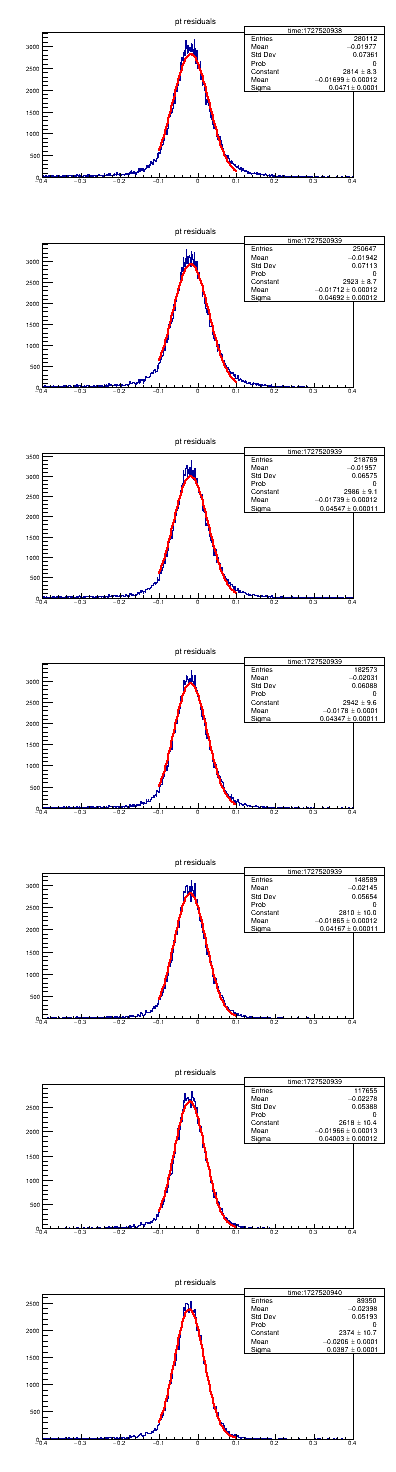

In [85]:
c = ROOT.TCanvas("canvas_name", "Canvas", 400, 1500)
ROOT.gStyle.SetOptFit(1011)
c.Divide(1,len(hists))
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist.Draw()
c.Draw()

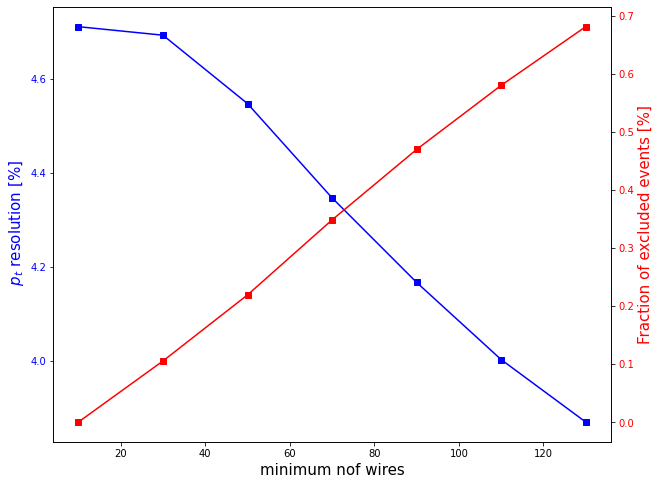

In [86]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(bin_center, resolution, 's-', color='blue')
ax.set_xlabel(r"minimum nof wires", fontsize=15)
ax.set_ylabel(r" $p_t$ resolution [%]", fontsize=15, color='blue')
ax.tick_params(axis='y', labelcolor='blue')

x2 = ax.twinx()

# Plotta l'efficienza sull'asse destro
x2.plot(bin_center, 1-np.array(efficiency), 's-', color='red')  # 's-' per visualizzare quadrati collegati
x2.set_ylabel("Fraction of excluded events [%]", fontsize=15, color='red')
x2.tick_params(axis='y', labelcolor='red')

In [80]:
df_manager.DefineSample("high_chi2", "chi2_fit_zy > 1000")
df_manager.DefineSample("low_chi2", "chi2_fit_zy < 1000")
df_manager.DefineSample("enough_wires", "nof_fired_wires > 70")

In [81]:
high_chi2 = df_manager.GetSample("high_chi2")
low_chi2 = df_manager.GetSample("low_chi2")
good_sample = df_manager.GetSample("enough_wires")

Text(0.5, 1.0, ' number of fired wires > 70')

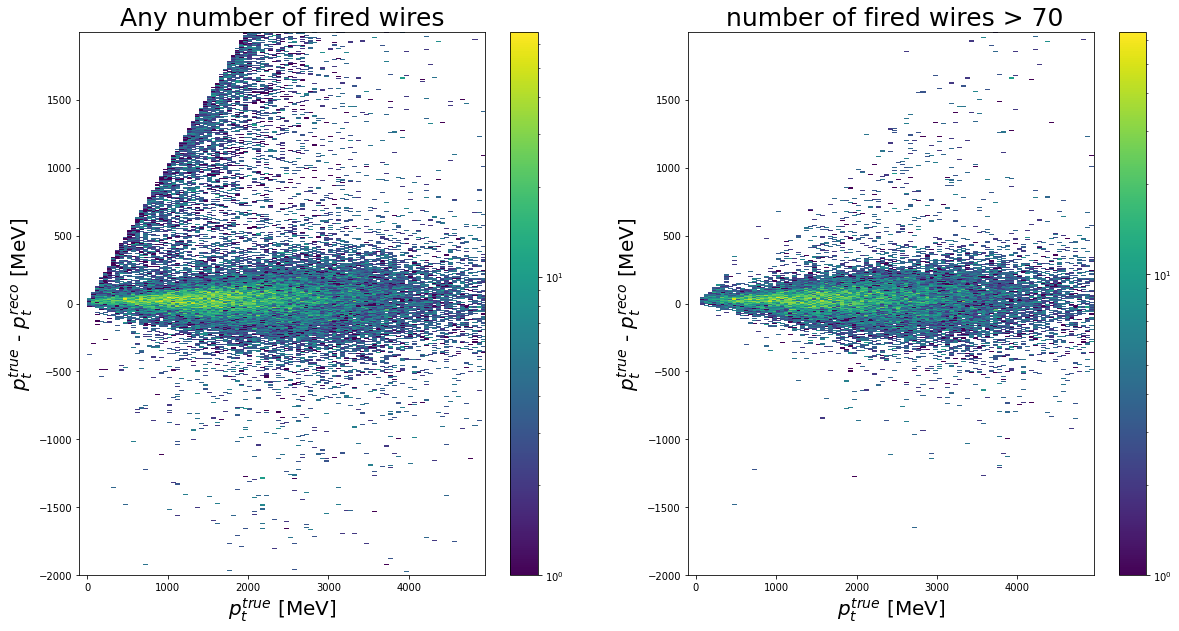

In [89]:
plotter = MultiPlotter(nrows = 1, ncols = 2, figsize = (20, 10))

plotter.plot_hist2d(
    x = df["Antimuon_pt_true"],
    y = df["Antimuon_pt_true"] - df["Antimuon_pt_reco"],
    bins_x = range['pt'],
    bins_y = np.arange(-2000,2000,1),
    xlabel = r"$p_t^{true}$ [MeV]",
    ylabel = r"$p_t^{true}$ - $p_t^{reco}$ [MeV]",
    log_scale = True
    # y = df["Antimuon_pt_residual"],
    # bins_y = np.arange(-2,2,0.05),
    # ylabel = r"(1 / $p_t^{true}$ - $1 / p_t^{reco}$ ) / ($1 / p_t^{reco}$)",
)

plotter.axes[plotter.current_ax].set_title("Any number of fired wires", fontsize=25)

plotter.next_plot()

plotter.plot_hist2d(
    x = good_sample.dataframe["Antimuon_pt_true"],
    y = good_sample.dataframe["Antimuon_pt_true"] - good_sample.dataframe["Antimuon_pt_reco"],
    bins_x = range['pt'],
    bins_y = np.arange(-2000,2000,1),
    xlabel = r"$p_t^{true}$ [MeV]",
    ylabel = r"$p_t^{true}$ - $p_t^{reco}$ [MeV]",
    log_scale = True
    # y = df["Antimuon_pt_residual"],
    # bins_y = np.arange(-2,2,0.05),
    # ylabel = r"(1 / $p_t^{true}$ - $1 / p_t^{reco}$ ) / ($1 / p_t^{reco}$)",
)

plotter.axes[plotter.current_ax].set_title(" number of fired wires > 70", fontsize=25)


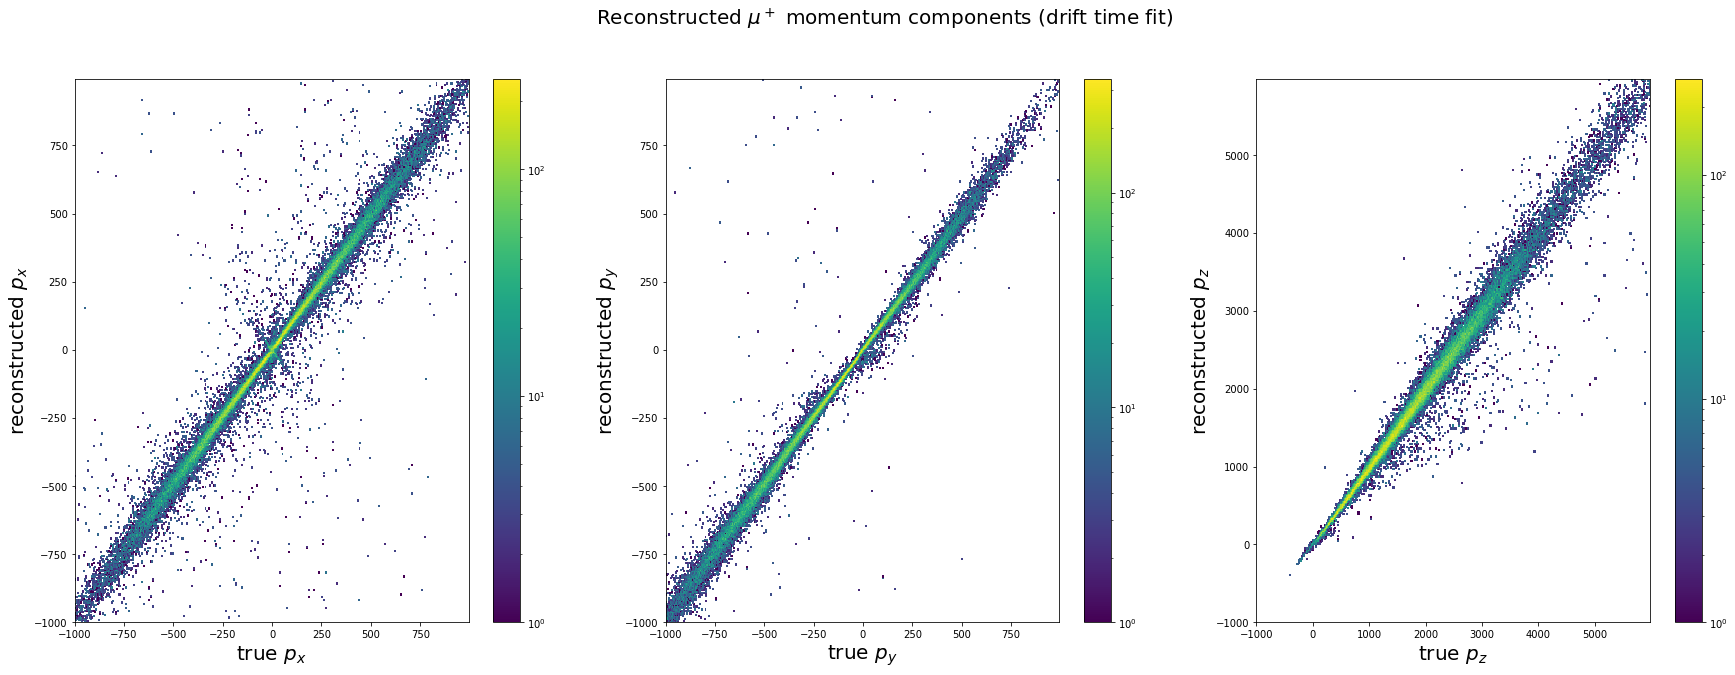

In [92]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=3, figsize=(30, 10), suptitle=r"Reconstructed $\mu^+$ momentum components (drift time fit)")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_p_truefX'],
    y=good_sample.dataframe['Antimuon_p_recofX'],
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_x$",
    ylabel=r"reconstructed $p_x$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()


# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_p_truefY'],
    y=good_sample.dataframe['Antimuon_p_recofY'],
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_y$",
    ylabel=r"reconstructed $p_y$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_p_truefZ'],
    y=good_sample.dataframe['Antimuon_p_recofZ'],
    bins_x=np.arange(-1000, 6000, 20),
    bins_y=np.arange(-1000, 6000, 20),
    xlabel=r"true $p_z$",
    ylabel=r"reconstructed $p_z$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])

all_hists.append(plotter)

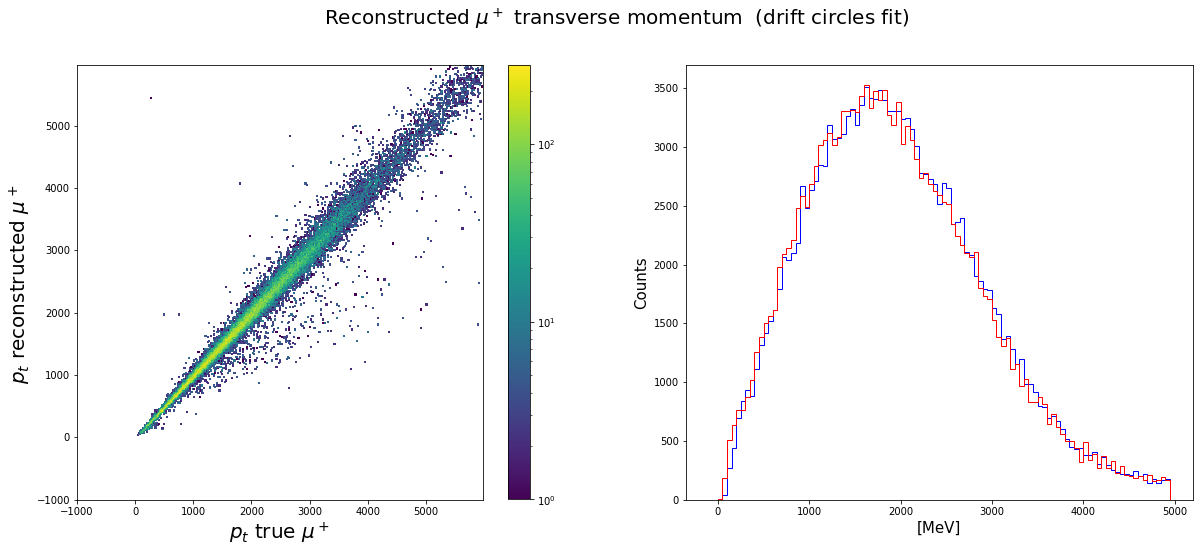

In [100]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ transverse momentum  (drift circles fit)")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_pt_true'],
    y=good_sample.dataframe['Antimuon_pt_reco'],
    bins_x=np.arange(-1000, 6000, 20),
    bins_y=np.arange(-1000, 6000, 20),
    xlabel=r"$p_t$ true $\mu^+$",
    ylabel=r"$p_t$ reconstructed $\mu^+$ ",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_pt_true'],
    bins=np.arange(-100, 5000, 50),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_pt_reco'],
    bins=np.arange(-100, 5000, 50),
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)

all_hists.append(plotter)

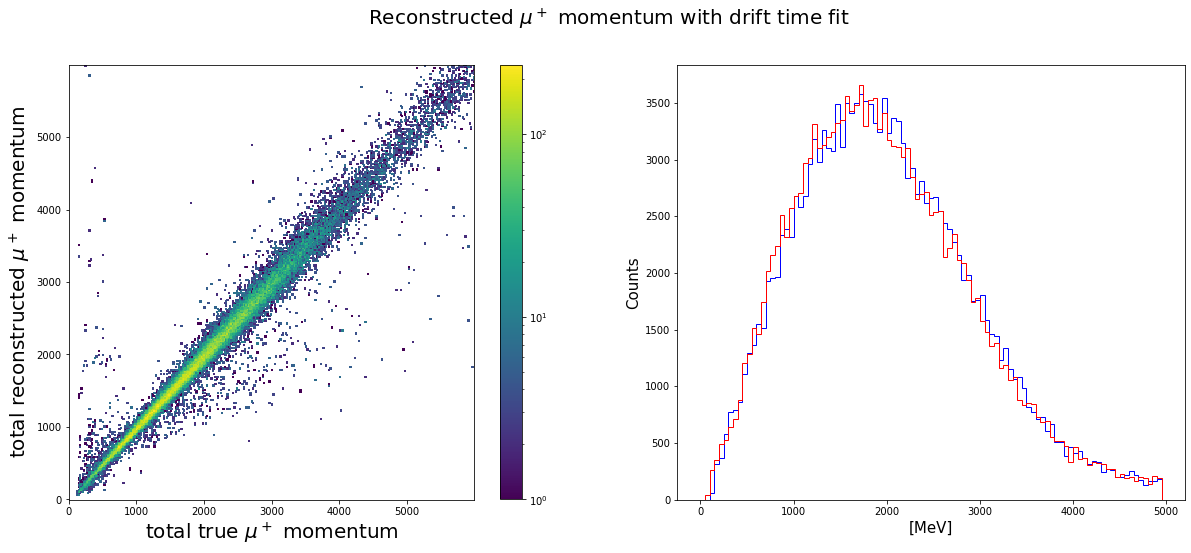

In [99]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ momentum with drift time fit")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_ptot_true'],
    y=good_sample.dataframe['Antimuon_ptot_reco'],
    bins_x=np.arange(-1, 6000, 20),
    bins_y=np.arange(-1, 6000, 20),
    xlabel=r"total true $\mu^+$ momentum",
    ylabel=r"total reconstructed $\mu^+$ momentum",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_ptot_true'],
    bins=np.arange(0, 5000, 50),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_ptot_reco'],
    bins=np.arange(0, 5000, 50),
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)
all_hists.append(plotter)

In [18]:
df.columns

Index(['index', 'digit_file_input', 'Antimuon_pt_true', 'Antimuon_pt_reco',
       'Antimuon_p_truefX', 'Antimuon_p_truefY', 'Antimuon_p_truefZ',
       'Antimuon_p_recofX', 'Antimuon_p_recofY', 'Antimuon_p_recofZ',
       'Antimuon_ptot_true', 'Antimuon_ptot_reco', 'Antimuon_dip_true',
       'Antimuon_dip_reco', 'Antimuon_Phi0_true', 'Antimuon_Phi0_reco',
       'Antimuon_x0_truefX', 'Antimuon_x0_truefY', 'Antimuon_x0_truefZ',
       'Antimuon_x0_recofX', 'Antimuon_x0_recofY', 'Antimuon_x0_recofZ',
       'PredictedNeutron_P3_GeVfX', 'PredictedNeutron_P3_GeVfY',
       'PredictedNeutron_P3_GeVfZ', 'FinalStateHadronicSystemTotal4Momentum_x',
       'FinalStateHadronicSystemTotal4Momentum_y',
       'FinalStateHadronicSystemTotal4Momentum_z',
       'FinalStateHadronicSystemTotal4Momentum_t', 'Antimuon_ptot_residual',
       'Antimuon_pt_residual'],
      dtype='object')

 FCN=1358.27 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.82241e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.92789e+03   9.62897e+00   1.29914e-01   8.35282e-05
   2  Mean        -1.70036e-02   1.16856e-04   2.09169e-06   4.98826e-02
   3  Sigma        4.33596e-02   1.11990e-04   1.20875e-05   6.08117e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


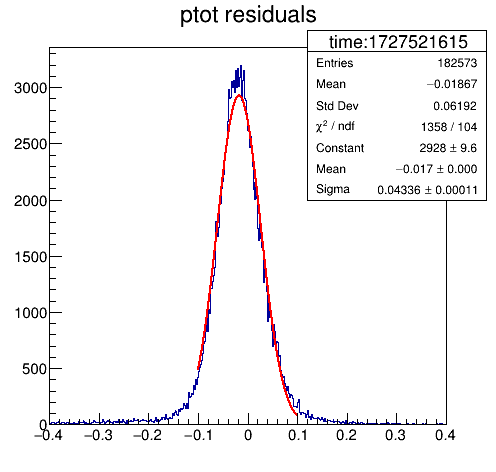

In [101]:
hist_ptot = tool.FillTH1D(iterable = good_sample.dataframe['Antimuon_ptot_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "ptot residuals", 
                          nbins = int(np.sqrt(len(good_sample.dataframe))),
                          #  nbins = 30,
                          x_min = -0.4, 
                          x_max = 0.4)

hist_ptot, mean, sigma = tool.FitTH1D_w_gauss(hist = hist_ptot, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

c = ROOT.TCanvas("canvas_name", "Canvas", 500, 500)
ROOT.gStyle.SetOptFit()
hist_ptot.Draw()
c.Draw()

In [106]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 1, 2, 2.5, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists = [], []

df_cut = good_sample.dataframe
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut['Antimuon_pt_true'] - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['Antimuon_pt_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)

500.0
energy range [0.0,1000.0] : resolution 0.04936665276980863
1500.0
energy range [1000.0,2000.0] : resolution 0.041518340520210036
2250.0
energy range [2000.0,2500.0] : resolution 0.04146323284020564
2750.0
energy range [2500.0,3000.0] : resolution 0.04005362960896938
4000.0
energy range [3000.0,5000.0] : resolution 0.04050897434274516
6500.0
energy range [5000.0,8000.0] : resolution 0.04036976144763479
 FCN=330.065 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=5.81197e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.92856e+02   8.69542e+00   6.04377e-02  -8.92601e-05
   2  Mean        -4.59011e-02   5.46396e-04   3.59141e-06   6.65433e-01
   3  Sigma        4.93667e-02   4.77732e-04   1.99567e-05   1.47708e-01
 FCN=688.122 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          7

Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521698 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521699 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521699 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521699 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


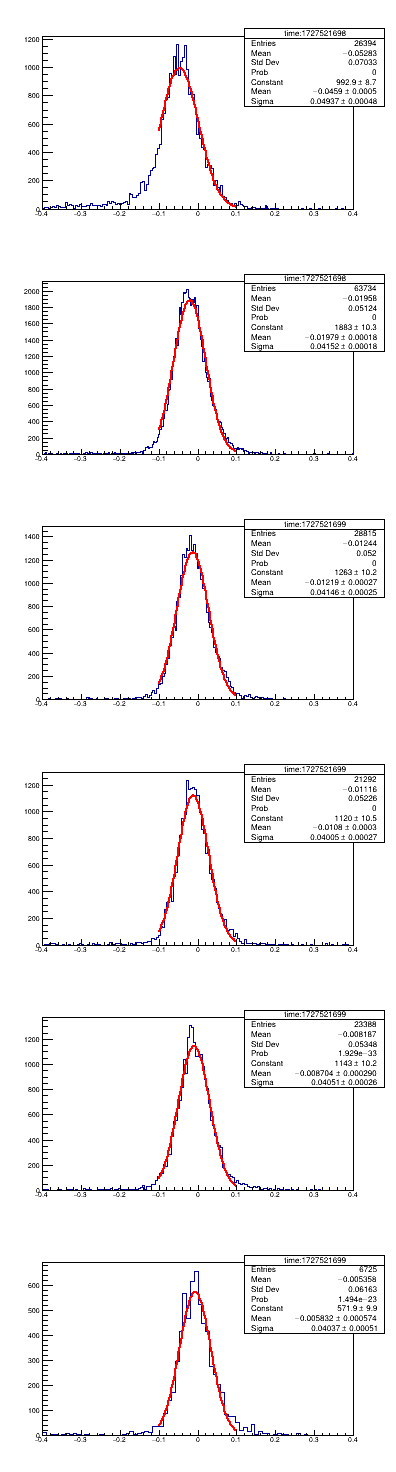

In [107]:
c = ROOT.TCanvas("canvas_name", "Canvas", 400, 1500)
ROOT.gStyle.SetOptFit(1011)
c.Divide(1,len(hists))
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist.Draw()
c.Draw()

No handles with labels found to put in legend.


Text(0.5, 0.98, '$\\mu$ momentum (transverse to B) resolution')

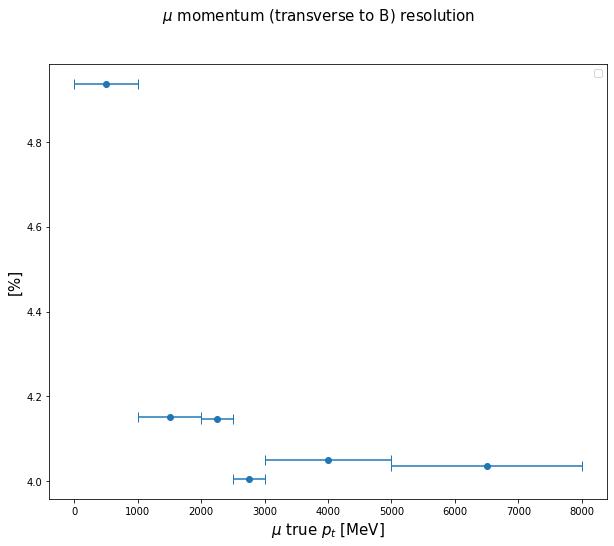

In [108]:
fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 ,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true $p_t$ [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
# plt.xticks(np.arange(0,6,0.5))
# plt.yticks(np.arange(0.1,2,0.1))
plt.legend()
plt.suptitle(r"$\mu$ momentum (transverse to B) resolution", fontsize=15)

In [110]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 1, 2, 2.5, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists = [], []

# df_cut = df[(df.TMinuitFinalStatus==1)&(df.nof_digits>10)]
df_cut = df
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut['Antimuon_ptot_true'] - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['Antimuon_ptot_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)

500.0
energy range [0.0,1000.0] : resolution 0.0588615162892912
1500.0
energy range [1000.0,2000.0] : resolution 0.04604005549680199
2250.0
energy range [2000.0,2500.0] : resolution 0.044798836564357326
2750.0
energy range [2500.0,3000.0] : resolution 0.04367465198065087
4000.0
energy range [3000.0,5000.0] : resolution 0.04332966839647698
6500.0
energy range [5000.0,8000.0] : resolution 0.04285438296733591
 FCN=301.211 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=7.99185e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.41848e+02   6.83656e+00   4.44852e-02   2.90195e-05
   2  Mean        -3.76242e-02   6.05748e-04   3.88609e-06   3.48353e-01
   3  Sigma        5.88615e-02   5.82546e-04   2.00380e-05   1.55862e-01
 FCN=1025.12 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81

Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521747 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521747 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521747 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521747 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1727521747 (Potential memory leak).


No handles with labels found to put in legend.


Text(0.5, 1.0, '$\\mu$ momentum resolution')

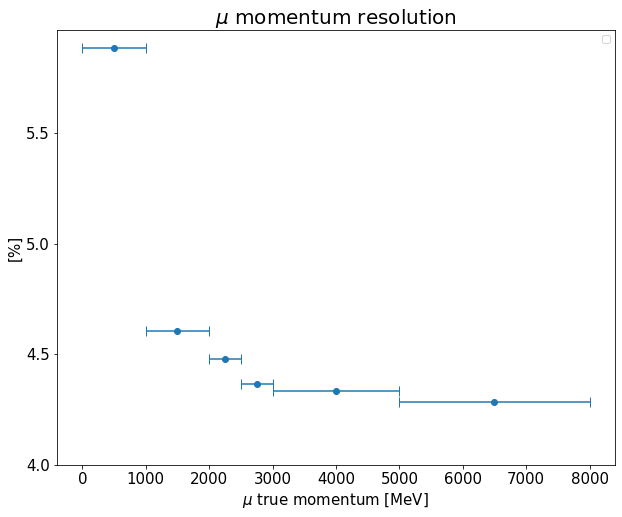

In [112]:
fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 ,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true momentum [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(np.arange(4,6,0.5), fontsize=15)
plt.legend()
plt.title(r"$\mu$ momentum resolution", fontsize=20)

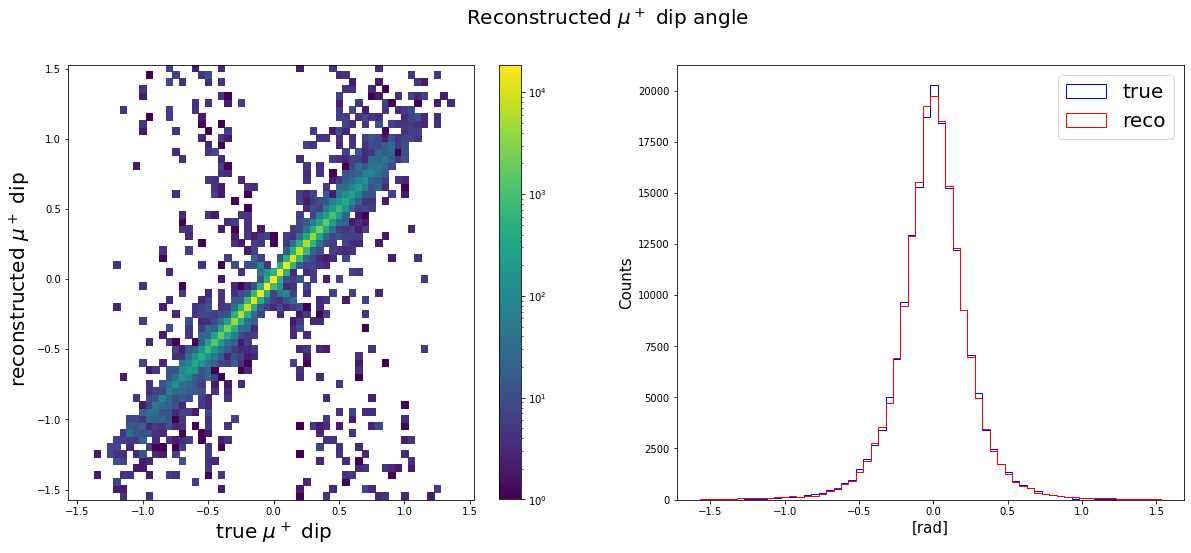

In [114]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ dip angle ")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=good_sample.dataframe['Antimuon_dip_true'],
    y=good_sample.dataframe['Antimuon_dip_reco'],
    bins_x=np.arange(-np.pi/2, np.pi/2, 0.05),
    bins_y=np.arange(-np.pi/2, np.pi/2, 0.05),
    xlabel=r" true $\mu^+$ dip",
    ylabel=r" reconstructed $\mu^+$ dip",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_dip_true'],
    bins=np.arange(-np.pi/2, np.pi/2, 0.05),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=good_sample.dataframe.dropna()['Antimuon_dip_reco'],
    bins=np.arange(-np.pi/2, np.pi/2, 0.05),
    label='reco',
    color='red',
    xlabel="[red]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[rad]",
    ylabel="Counts",
    fontsize=15
)

plotter.axes[plotter.current_ax].legend(fontsize=20)

all_hists.append(plotter)

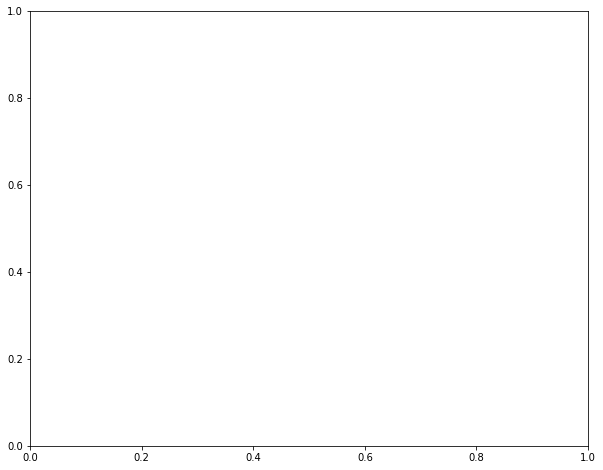

In [24]:
MultiPlotter().save_multiple_figures_to_pdf('/storage/gpfs_data/neutrino/users/gi/sand-physics/scratch/drift_reco.pdf', all_hists)

In [10]:
def Tuple2String(input_column: tuple) -> str:
    """
    Parse input column (tuple) and return a short name.
    
    Example:
    ('PrimariesFirstHitECAL', 'fP', 'fX') -> PrimariesFirstHitECAL_x
    ('PrimariesFirstHitECAL', 'fE', '')   -> PrimariesFirstHitECAL_t
    """
    colName, suffix1, suffix2 = input_column
    if suffix1 == 'fP':
        if suffix2 == 'fX':
            return colName + "_x"
        elif suffix2 == 'fY':
            return colName + "_y"
        elif suffix2 == 'fZ':
            return colName + "_z"
        else:
            return colName
    elif suffix1 == 'fE':
        return colName + "_t"
    else:
        return colName

In [11]:
Tuple2String(('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fX'))

'FinalStateHadronicSystemTotal4Momentum_x'

In [12]:
new_columns = {col: Tuple2String(col) for col in df.columns}

In [13]:
df.columns = ['_'.join(filter(None, col)).strip() for col in df.columns]

In [14]:
df = df.rename(columns=new_columns)

In [15]:
df

FileName  \
edep_file_input                                    edep_event_index                                                      
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 67                events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   132               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   166               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   197               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
                                                   256               events-in-SANDtracker.781.gtrac.root:gRooTrack...   
...                                                                                                                ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 993               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   995               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   996               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   997               events-in-SANDtracker.489.gtrac.root:gRooTrack...   
                                                   998               events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                                                                      digit_file_input  \
edep_file_input                                    edep_event_index                                                      
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 67                /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   132               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   166               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   197               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   256               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                                                                ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 993               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   995               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   996               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   997               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   998               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                                                                     Antimuon_pt_true  \
edep_file_input                                    edep_event_index                     
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 67                      522.099376   
                                                   132                     989.351727   
                                                   166                    2253.443004   
                                                   197                    1503.738688   
                                                   256                    1222.613215   
...                                                                               ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 993                    4131.738889   
                                                   995                    1831.899229   
                                              

In [16]:
def extract_number_from_string(string: str) -> int:
    """
    Extracts the number from the given string using string splitting.

    Parameters:
    - string (str): The input string containing the number.

    Returns:
    - int: The extracted number.
    """
    # Split the string by dots and extract the relevant part
    parts = string.split('.')
    number = int(parts[1])  # Convert the extracted part to an integer
    return number


In [17]:
df = df.reset_index()

In [18]:
df

,edep_file_input,edep_event_index,FileName,digit_file_input,Antimuon_pt_true,Antimuon_pt_reco,Antimuon_p_truefX,Antimuon_p_truefY,Antimuon_p_truefZ,Antimuon_p_recofX,...,Antimuon_x0_recofZ,PredictedNeutron_P3_GeVfX,PredictedNeutron_P3_GeVfY,PredictedNeutron_P3_GeVfZ,FinalStateHadronicSystemTotal4Momentum_fP_fX,FinalStateHadronicSystemTotal4Momentum_fP_fY,FinalStateHadronicSystemTotal4Momentum_fP_fZ,FinalStateHadronicSystemTotal4Momentum_fE,Antimuon_ptot_residual,Antimuon_pt_residual
0,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,67,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,522.099376,10.420764,-253.912182,34.321135,520.970074,-0.109061,...,24347.776338,NaN,NaN,NaN,0.164788,-0.306311,1.022362,5.429350,NaN,-0.980041
1,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,132,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,989.351727,1013.015214,-92.446478,517.337308,843.314265,-120.929260,...,22889.599246,0.119838,-0.889375,2.649545,0.235934,-0.746615,0.984869,2.598397,0.013101,0.023918
2,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,166,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,2253.443004,742.751889,-67.140961,-460.529729,2205.882531,-16.027322,...,22927.030029,0.075436,-2.129964,22.837873,0.405728,0.102753,0.102970,1.954442,-0.429465,-0.670392
3,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,197,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1503.738688,645.533536,561.242016,-269.744670,1479.347104,228.157081,...,22889.106412,-0.226183,-0.595441,7.444428,-0.552500,-0.624693,3.230762,10.637395,-0.350598,-0.570714
4,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,256,events-in-SANDtracker.781.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1222.613215,1193.390952,618.720935,-85.336197,1219.631422,604.550561,...,22957.717502,-0.613739,-0.229354,1.996479,-0.749570,-0.102901,0.436887,1.283003,-0.011921,-0.023901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280202,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,993,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,4131.738889,144.979751,196.309932,-529.009536,4097.732929,-6.836078,...,25146.348418,NaN,NaN,NaN,-0.460505,0.121122,0.266634,1.992250,NaN,-0.964911
280203,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,995,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,1831.899229,74.103009,483.452335,97.273334,1829.314813,-18.590774,...,25254.550083,NaN,NaN,NaN,-0.542339,-0.266530,0.540469,1.240991,NaN,-0.959549
280204,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,996,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,280.082042,259.339056,-581.049102,-32.845904,278.149415,-554.886942,...,23123.006908,0.552351,-1.535828,15.376720,0.707111,-0.053931,0.915275,1.491116,-0.025578,-0.074060
280205,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,997,events-in-SANDtracker.489.gtrac.root:gRooTrack...,/storage/gpfs_data/neutrino/users/gi/SAND-DRIF...,3557.051772,17344.849048,391.728427,-897.002394,3442.092970,1908.042992,...,24712.399731,-1.908998,4.056537,-16.114699,-0.560712,0.739886,0.787934,6.293269,1.208080,3.876187


In [19]:
df['FileNumber'] = df.apply(lambda row : extract_number_from_string(row["edep_file_input"]), axis=1)

In [20]:
df["EventNumber"] = df["edep_event_index"]

In [21]:
df = df.set_index(['FileNumber','EventNumber'])

In [22]:
df

edep_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        edep_event_index  \
FileNumber EventNumber                     
781        67                         67   
           132                       132   
           166                       166   
           197                       197   
           256                       256   
...                                  ...   
489        993                       993   
           995                       995   
           996                       996   
           997                       997   
           998                       998   

                                                                 FileName  \
FileNumber EventNumber                                                      
781        67           events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           132          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           166          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           197          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           256          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
...                                                                   ...   
489        993          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           995          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           996          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           997          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           998          events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                         digit_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        Antimuon_pt_true  Antimuon_pt_reco  Antimuon_p_truefX  \
FileNumber EventNumber                                                          
781        67                 522.099376         10.420764        -253.912182   
           132                989.351727       1013.015214         -92.446478   
           166               2253.443004        742.751889         -67.140961   
           197               1503.738688        645.533536         561.242

In [24]:
df.columns

Index(['edep_file_input', 'edep_event_index', 'FileName', 'digit_file_input',
       'Antimuon_pt_true', 'Antimuon_pt_reco', 'Antimuon_p_truefX',
       'Antimuon_p_truefY', 'Antimuon_p_truefZ', 'Antimuon_p_recofX',
       'Antimuon_p_recofY', 'Antimuon_p_recofZ', 'Antimuon_ptot_true',
       'Antimuon_ptot_reco', 'Antimuon_dip_true', 'Antimuon_dip_reco',
       'Antimuon_Phi0_true', 'Antimuon_Phi0_reco', 'Antimuon_x0_truefX',
       'Antimuon_x0_truefY', 'Antimuon_x0_truefZ', 'Antimuon_x0_recofX',
       'Antimuon_x0_recofY', 'Antimuon_x0_recofZ', 'PredictedNeutron_P3_GeVfX',
       'PredictedNeutron_P3_GeVfY', 'PredictedNeutron_P3_GeVfZ',
       'FinalStateHadronicSystemTotal4Momentum_fP_fX',
       'FinalStateHadronicSystemTotal4Momentum_fP_fY',
       'FinalStateHadronicSystemTotal4Momentum_fP_fZ',
       'FinalStateHadronicSystemTotal4Momentum_fE', 'Antimuon_ptot_residual',
       'Antimuon_pt_residual'],
      dtype='object')

In [23]:
np.sum(df['Antimuon_Phi0_true'] - df['Antimuon_Phi0_reco'])

0.0

In [48]:
x_true = df['Antimuon_x0_truefX']
y_true = df['Antimuon_x0_truefY']
z_true = df['Antimuon_x0_truefZ']


px_true = df['Antimuon_p_truefX']
py_true = df['Antimuon_p_truefY']
pz_true = df['Antimuon_p_truefZ']

Phi0_true = np.array([math.atan2(py, pz) - np.pi/2 for py, pz in zip(py_true, pz_true)]) # CORRETTO!

pt_true = df['Antimuon_pt_true']

R_true = pt_true / 0.3 / 0.6
zc_true = z_true - R_true * np.cos(Phi0_true)
yc_true = y_true - R_true * np.sin(Phi0_true)

h = - 1 # mu+

In [29]:
py_reco = pt_true * np.sin(np.pi/2 + Phi0_true) # CORRETTE
pz_reco = pt_true * np.cos(np.pi/2 + Phi0_true)

In [25]:
Phi0_reco = np.array([math.atan2(y - yc, z - zc) - np.pi/2 for y, z, yc, zc  in zip(y_true, z_true, yc_true, zc_true)])

In [58]:
Phi0_true = df['Antimuon_Phi0_true']
theta_true = df['Antimuon_Phi0_true'] + np.pi/2

In [93]:
py_reco = pt_true * np.sin(np.pi/2 + Phi0_true)
pz_reco = pt_true * np.cos(np.pi/2 + Phi0_true)

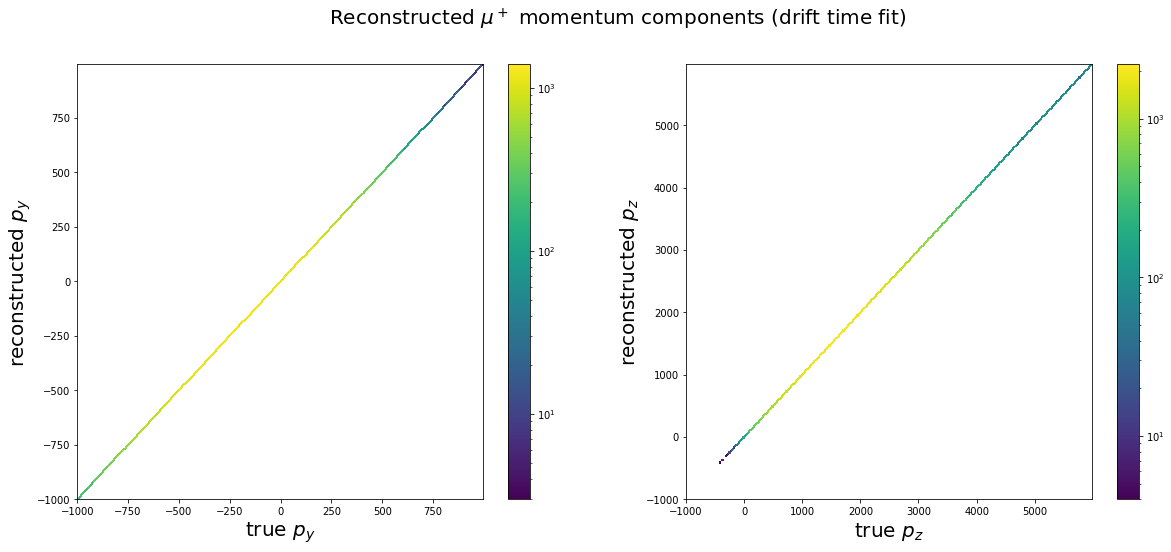

In [51]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ momentum components (drift time fit)")


# Plot the 2D histogram
plotter.plot_hist2d(
    x=py_true,
    # y=py_reco,
    y = pt_true * (-h * (z_true - zc_true)/R_true),
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_y$",
    ylabel=r"reconstructed $p_y$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

plotter.next_plot()

# Plot the 2D histogram
plotter.plot_hist2d(
    x=pz_true,
    # y=pz_reco,
    y = pt_true * (h * (y_true - yc_true)/R_true),
    bins_x=np.arange(-1000, 6000, 20),
    bins_y=np.arange(-1000, 6000, 20),
    xlabel=r"true $p_z$",
    ylabel=r"reconstructed $p_z$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

(array([ 302., 7398., 1605.,  341.,  255.,   79., 1273., 1722.,  214.,
         173.]),
 array([0.61212024, 1.1756361 , 1.73915197, 2.30266784, 2.86618371,
        3.42969958, 3.99321544, 4.55673131, 5.12024718, 5.68376305,
        6.24727892]),
 <BarContainer object of 10 artists>)

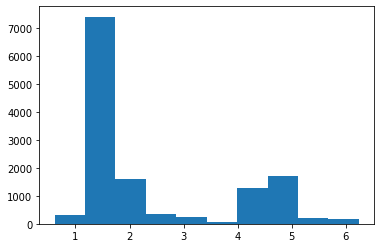

In [92]:
plt.hist(df.query("Antimuon_p_truefX > 0 & Antimuon_p_recofX < 0")["Antimuon_Phi0_true"])

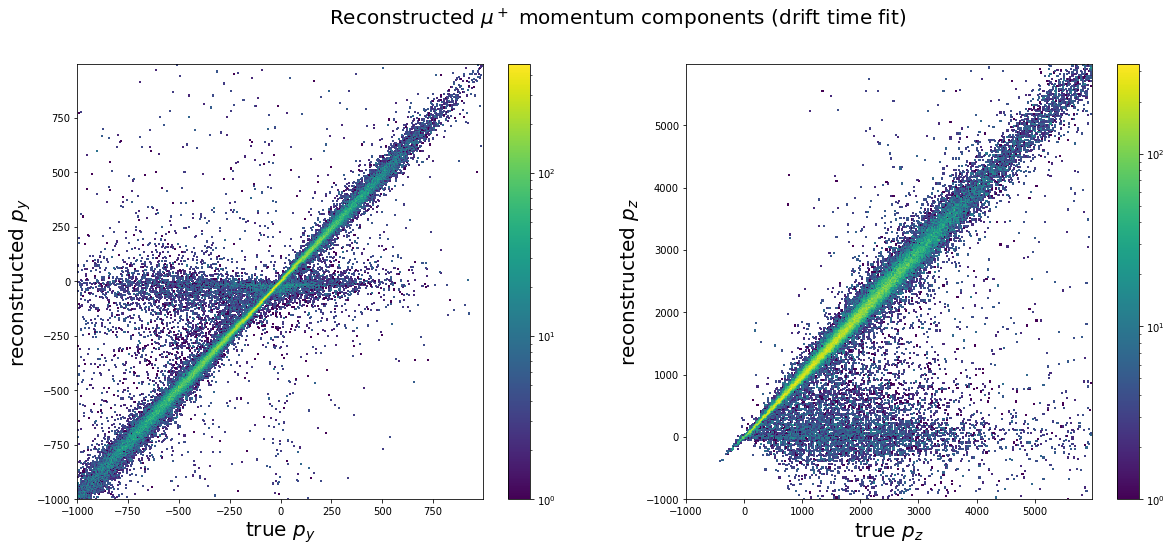

In [44]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 8), suptitle=r"Reconstructed $\mu^+$ momentum components (drift time fit)")


# Plot the 2D histogram
plotter.plot_hist2d(
    x=df['Antimuon_p_truefY'],
    y=df['Antimuon_p_recofY'],
    bins_x=np.arange(-1000, 1000, 5),
    bins_y=np.arange(-1000, 1000, 5),
    xlabel=r"true $p_y$",
    ylabel=r"reconstructed $p_y$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

plotter.next_plot()

# Plot the 2D histogram
plotter.plot_hist2d(
    x=df['Antimuon_p_truefZ'],
    y=df['Antimuon_p_recofZ'],
    bins_x=np.arange(-1000, 6000, 20),
    bins_y=np.arange(-1000, 6000, 20),
    xlabel=r"true $p_z$",
    ylabel=r"reconstructed $p_z$",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]

In [37]:
import glob

In [38]:
production = glob.glob("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.*.to.*.ecal-digit.analysed.root")

In [39]:
converter = Converter(production, "digit_extended")

In [40]:
columns_df = ['FileName',
              'EventId',
              'EventType',
              'CCQEonHydrogen',
              'Interaction_vtxX',
              'Interaction_vtxY',
              'Interaction_vtxZ',
              'InteractionTarget',
              'InteractionVolume',
              'PrimaryStateHadronicSystemTopology_name',
              'NofFinalStateChargedParticles',
              'PrimaryStateHadronicSystemTotalKinE',
              'MissingTransverseMomentum',
              'ExpectedHadronSystP3',
              'ExpectedNeutronArrivalPositionECAL',
              'ExpectedFiredModuleByNeutron',
 ]

In [41]:
events = converter.CreatePandas(
    columns = columns_df,
    rename = False,
    indices = ['FileName']
)
events

,EventId,EventType,CCQEonHydrogen,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InteractionTarget,InteractionVolume,PrimaryStateHadronicSystemTopology_name,NofFinalStateChargedParticles,PrimaryStateHadronicSystemTotalKinE,MissingTransverseMomentum,ExpectedHadronSystP3fX,ExpectedHadronSystP3fY,ExpectedHadronSystP3fZ,ExpectedNeutronArrivalPositionECALfX,ExpectedNeutronArrivalPositionECALfY,ExpectedNeutronArrivalPositionECALfZ,ExpectedFiredModuleByNeutron
FileName,,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:1,1,RES,0,1.242352,-1.403393,23.896879,C12,C3H6Target_A,n + pi-,4,0.591349,0.267179,0.368563,-0.498698,0.265994,1752.815282,-2094.092856,24265.282609,30
events-in-SANDtracker.0.gtrac.root:gRooTracker:3,3,QES,0,0.820999,-3.544753,23.587400,Au197,C3H6DriftModule_1_B_Fwire,n,1,0.046306,0.173558,0.112843,0.388360,0.184168,1683.962448,-574.776107,24995.819941,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:9,9,RES,0,-1.037001,-1.725935,23.652175,C12,C3H6Target_A,n + pi-,3,0.305087,0.084040,0.413779,0.330851,0.280885,534.587010,-469.319301,24719.013778,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:10,10,DIS,0,0.883028,-3.059783,24.158058,C12,C3H6Target_A,Other,4,13.259317,0.467831,-0.007376,-0.099379,0.031446,784.237801,-4390.748865,24579.207003,13
events-in-SANDtracker.0.gtrac.root:gRooTracker:15,15,RES,0,-1.013635,-2.847853,25.219540,C12,C3H6Target_X1,Other,1,0.976242,0.210935,-0.134523,-0.164562,0.035004,-1761.816272,-3763.107754,25414.226198,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.399.gtrac.root:gRooTracker:991,991,QES,0,-1.491612,-2.640649,24.380837,C12,C3H6Target_B,n,1,0.295896,0.164178,0.273556,0.282453,0.169521,163.093273,-932.130918,25406.246974,21
events-in-SANDtracker.399.gtrac.root:gRooTracker:993,993,RES,0,-1.042010,-3.543208,24.415813,C12,C3H6Target_B,n + pi-,1,0.385875,0.256484,0.026868,-0.144286,0.002748,-877.094376,-4428.841304,24432.682850,13
events-in-SANDtracker.399.gtrac.root:gRooTracker:995,995,DIS,0,1.270068,-3.868721,24.746536,C12,C3H6Target_C,Other,3,0.496586,0.246702,-0.142334,-0.200481,0.053747,996.148010,-4254.543828,24849.972957,14


In [42]:
events = events.reset_index().set_index(["FileName","EventId"])
events

,,EventType,CCQEonHydrogen,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InteractionTarget,InteractionVolume,PrimaryStateHadronicSystemTopology_name,NofFinalStateChargedParticles,PrimaryStateHadronicSystemTotalKinE,MissingTransverseMomentum,ExpectedHadronSystP3fX,ExpectedHadronSystP3fY,ExpectedHadronSystP3fZ,ExpectedNeutronArrivalPositionECALfX,ExpectedNeutronArrivalPositionECALfY,ExpectedNeutronArrivalPositionECALfZ,ExpectedFiredModuleByNeutron
FileName,EventId,,,,,,,,,,,,,,,,,,
events-in-SANDtracker.0.gtrac.root:gRooTracker:1,1,RES,0,1.242352,-1.403393,23.896879,C12,C3H6Target_A,n + pi-,4,0.591349,0.267179,0.368563,-0.498698,0.265994,1752.815282,-2094.092856,24265.282609,30
events-in-SANDtracker.0.gtrac.root:gRooTracker:3,3,QES,0,0.820999,-3.544753,23.587400,Au197,C3H6DriftModule_1_B_Fwire,n,1,0.046306,0.173558,0.112843,0.388360,0.184168,1683.962448,-574.776107,24995.819941,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:9,9,RES,0,-1.037001,-1.725935,23.652175,C12,C3H6Target_A,n + pi-,3,0.305087,0.084040,0.413779,0.330851,0.280885,534.587010,-469.319301,24719.013778,22
events-in-SANDtracker.0.gtrac.root:gRooTracker:10,10,DIS,0,0.883028,-3.059783,24.158058,C12,C3H6Target_A,Other,4,13.259317,0.467831,-0.007376,-0.099379,0.031446,784.237801,-4390.748865,24579.207003,13
events-in-SANDtracker.0.gtrac.root:gRooTracker:15,15,RES,0,-1.013635,-2.847853,25.219540,C12,C3H6Target_X1,Other,1,0.976242,0.210935,-0.134523,-0.164562,0.035004,-1761.816272,-3763.107754,25414.226198,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
events-in-SANDtracker.399.gtrac.root:gRooTracker:991,991,QES,0,-1.491612,-2.640649,24.380837,C12,C3H6Target_B,n,1,0.295896,0.164178,0.273556,0.282453,0.169521,163.093273,-932.130918,25406.246974,21
events-in-SANDtracker.399.gtrac.root:gRooTracker:993,993,RES,0,-1.042010,-3.543208,24.415813,C12,C3H6Target_B,n + pi-,1,0.385875,0.256484,0.026868,-0.144286,0.002748,-877.094376,-4428.841304,24432.682850,13
events-in-SANDtracker.399.gtrac.root:gRooTracker:995,995,DIS,0,1.270068,-3.868721,24.746536,C12,C3H6Target_C,Other,3,0.496586,0.246702,-0.142334,-0.200481,0.053747,996.148010,-4254.543828,24849.972957,14


In [43]:
events_signal = events[events.CCQEonHydrogen==1]
events_signal = events_signal.reset_index()

In [44]:
events_signal['FileNumber'] = [int(file.split(".")[1]) for file in events_signal['FileName']]
events_signal['EventNumber'] = events_signal['EventId']

In [45]:
events_signal = events_signal.set_index(['FileNumber', 'EventNumber'])

In [46]:
df_signal = df.loc[df.index.intersection(events_signal.index)]
df_signal

edep_file_input  \
FileNumber EventNumber                                                      
781        847          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
500        568          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
796        63           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           82           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           121          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        751          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           755          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           807          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           924          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           969          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        edep_event_index  \
FileNumber EventNumber                     
781        847                       847   
500        568                       568   
796        63                         63   
           82                         82   
           121                       121   
...                                  ...   
489        751                       751   
           755                       755   
           807                       807   
           924                       924   
           969                       969   

                                                                 FileName  \
FileNumber EventNumber                                                      
781        847          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
500        568          events-in-SANDtracker.500.gtrac.root:gRooTrack...   
796        63           events-in-SANDtracker.796.gtrac.root:gRooTrack...   
           82           events-in-SANDtracker.796.gtrac.root:gRooTrack...   
           121          events-in-SANDtracker.796.gtrac.root:gRooTrack...   
...                                                                   ...   
489        751          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           755          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           807          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           924          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           969          events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                         digit_file_input  \
FileNumber EventNumber                                                      
781        847          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
500        568          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
796        63           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           82           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           121          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        751          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           755          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           807          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           924          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           969          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        Antimuon_pt_true  Antimuon_pt_reco  Antimuon_p_truefX  \
FileNumber EventNumber                                                          
781        847                910.861651         17.052869        -433.872787   
500        568               3581.470006       3538.323817        -143.383363   
796        63                2701.268899     133109.994273        -110.099785   
           82                3064.126865       2825.430114         268.528

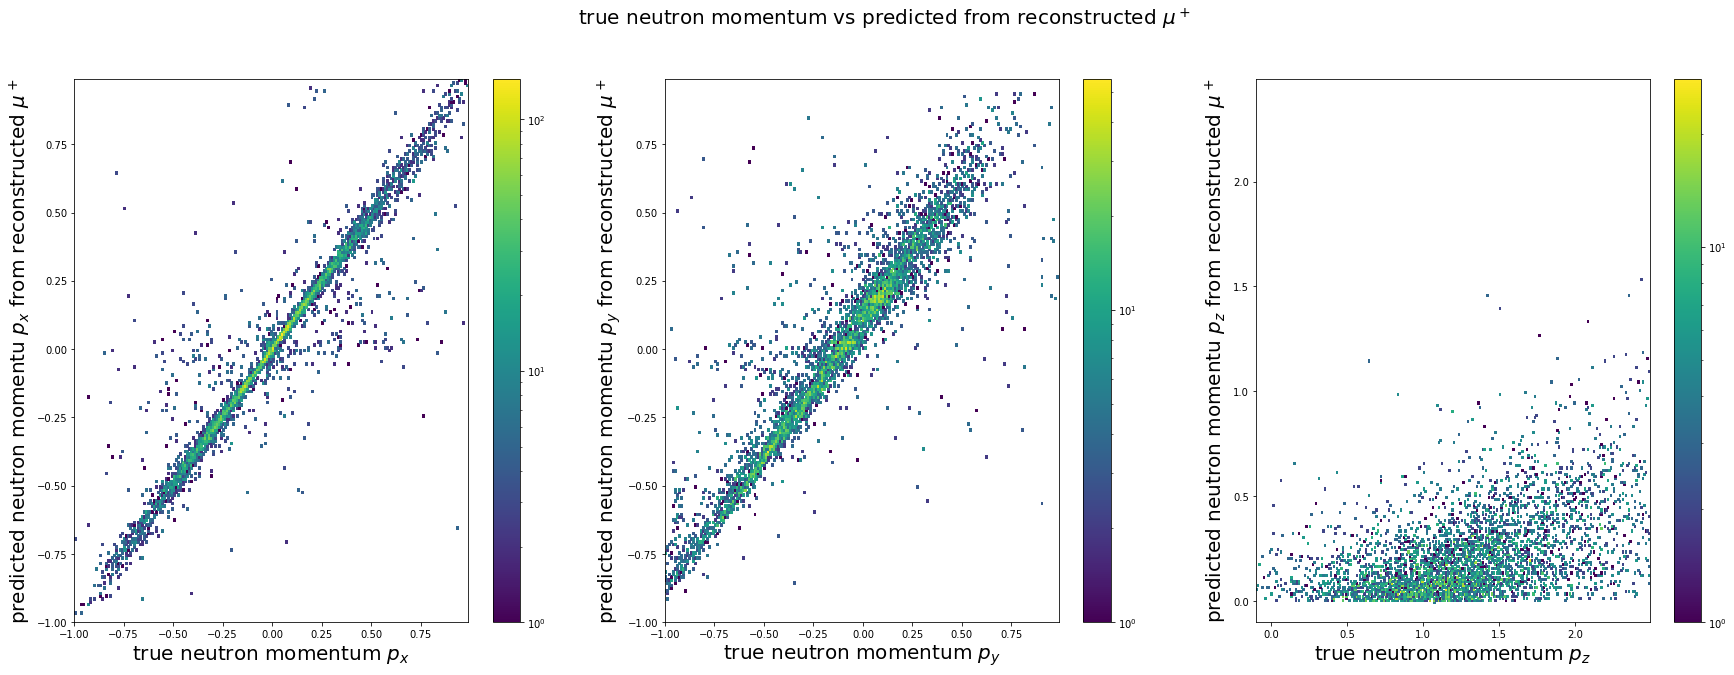

In [47]:
plotter = MultiPlotter(nrows=1, ncols=3, figsize=(30, 10), suptitle=r"true neutron momentum vs predicted from reconstructed $\mu^+$")

# First 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = df_signal['FinalStateHadronicSystemTotal4Momentum_fP_fX'],
    y = df_signal['PredictedNeutron_P3_GeVfX'],
    bins_x = np.arange(-1, 1, 0.01),
    bins_y = np.arange(-1, 1, 0.01),
    log_scale = True,
    xlabel = r'true neutron momentum $p_x$',
    ylabel = r'predicted neutron momentu $p_x$ from reconstructed $\mu^+$',
)
plotter.next_plot()

# Second 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = df_signal['PredictedNeutron_P3_GeVfY'],
    y = df_signal['FinalStateHadronicSystemTotal4Momentum_fP_fY'],
    bins_x = np.arange(-1, 1, 0.01),
    bins_y = np.arange(-1, 1, 0.01),
    log_scale = True,
xlabel = r'true neutron momentum $p_y$',
    ylabel = r'predicted neutron momentu $p_y$ from reconstructed $\mu^+$',
)
plotter.next_plot()

# Third 2D histogram plot with logarithmic scale
plotter.plot_hist2d(
    x = df_signal['PredictedNeutron_P3_GeVfZ'],
    y = df_signal['FinalStateHadronicSystemTotal4Momentum_fP_fZ'],
    bins_x = np.arange(-0.1, 2.5, 0.01),
    bins_y = np.arange(-0.1, 2.5, 0.01),
    log_scale = True,
    xlabel = r'true neutron momentum $p_z$',
    ylabel = r'predicted neutron momentu $p_z$ from reconstructed $\mu^+$',
)

In [48]:
df.columns

Index(['edep_file_input', 'edep_event_index', 'FileName', 'digit_file_input',
       'Antimuon_pt_true', 'Antimuon_pt_reco', 'Antimuon_p_truefX',
       'Antimuon_p_truefY', 'Antimuon_p_truefZ', 'Antimuon_p_recofX',
       'Antimuon_p_recofY', 'Antimuon_p_recofZ', 'Antimuon_ptot_true',
       'Antimuon_ptot_reco', 'Antimuon_dip_true', 'Antimuon_dip_reco',
       'Antimuon_Phi0_true', 'Antimuon_Phi0_reco', 'Antimuon_x0_truefX',
       'Antimuon_x0_truefY', 'Antimuon_x0_truefZ', 'Antimuon_x0_recofX',
       'Antimuon_x0_recofY', 'Antimuon_x0_recofZ', 'PredictedNeutron_P3_GeVfX',
       'PredictedNeutron_P3_GeVfY', 'PredictedNeutron_P3_GeVfZ',
       'FinalStateHadronicSystemTotal4Momentum_fP_fX',
       'FinalStateHadronicSystemTotal4Momentum_fP_fY',
       'FinalStateHadronicSystemTotal4Momentum_fP_fZ',
       'FinalStateHadronicSystemTotal4Momentum_fE', 'Antimuon_ptot_residual',
       'Antimuon_pt_residual'],
      dtype='object')

In [49]:
antimu_true = df[['Antimuon_p_truefX','Antimuon_p_truefY','Antimuon_p_truefZ']]

In [50]:
antimu_reco = df[['Antimuon_p_truefX','Antimuon_p_truefY','Antimuon_p_truefZ']]

In [51]:
antimu_true

Antimuon_p_truefX  Antimuon_p_truefY  \
FileNumber EventNumber                                         
781        67                 -253.912182          34.321135   
           132                 -92.446478         517.337308   
           166                 -67.140961        -460.529729   
           197                 561.242016        -269.744670   
           256                 618.720935         -85.336197   
...                                   ...                ...   
489        993                 196.309932        -529.009536   
           995                 483.452335          97.273334   
           996                -581.049102         -32.845904   
           997                 391.728427        -897.002394   
           998                 -42.587706        -876.265685   

                        Antimuon_p_truefZ  
FileNumber EventNumber                     
781        67                  520.970074  
           132                 843.314265  
           166                2205.882531  
           197                1479.347104  
           256                1219.631422  
...                                   ...  
489        993                4097.732929  
           995                1829.314813  
           996                 278.149415  
           997                3442.092970  
           998                2421.877453  

[280207 rows x 3 columns]

In [52]:
df

edep_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        edep_event_index  \
FileNumber EventNumber                     
781        67                         67   
           132                       132   
           166                       166   
           197                       197   
           256                       256   
...                                  ...   
489        993                       993   
           995                       995   
           996                       996   
           997                       997   
           998                       998   

                                                                 FileName  \
FileNumber EventNumber                                                      
781        67           events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           132          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           166          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           197          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
           256          events-in-SANDtracker.781.gtrac.root:gRooTrack...   
...                                                                   ...   
489        993          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           995          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           996          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           997          events-in-SANDtracker.489.gtrac.root:gRooTrack...   
           998          events-in-SANDtracker.489.gtrac.root:gRooTrack...   

                                                         digit_file_input  \
FileNumber EventNumber                                                      
781        67           /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           132          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           166          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           197          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           256          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                   ...   
489        993          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           995          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           996          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           997          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
           998          /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                        Antimuon_pt_true  Antimuon_pt_reco  Antimuon_p_truefX  \
FileNumber EventNumber                                                          
781        67                 522.099376         10.420764        -253.912182   
           132                989.351727       1013.015214         -92.446478   
           166               2253.443004        742.751889         -67.140961   
           197               1503.738688        645.533536         561.242